<a href="https://colab.research.google.com/github/Qbaxxx/Metody_analizy_danych_LAB_JBabinski/blob/main/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [25]:
df_zamowienia = pd.read_csv('https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_07/data/zamowienia.csv', sep=';')
df_narodzeni = pd.read_excel('https://github.com/kropiak/swps-metody-analizy-danych/raw/refs/heads/main/lab_07/data/imiona.xlsx')
df_ludnosc = pd.read_excel("https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/main/lab_07/data/ludnosc.xlsx")

Zadanie 1

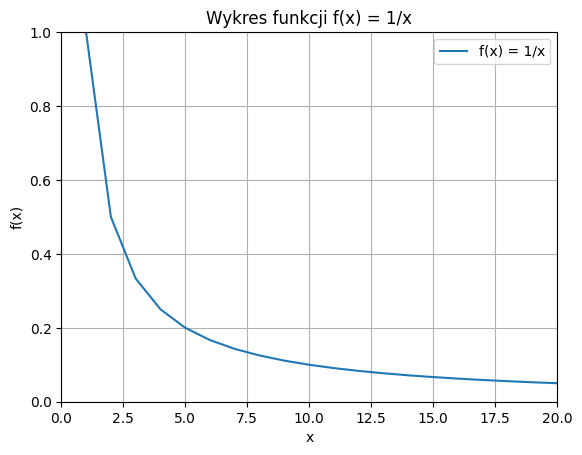

In [8]:
# Dane
x = np.arange(1, 21)
y = 1 / x

# Tworzenie wykresu
plt.plot(x, y, label='f(x) = 1/x')

# Etykiety osi
plt.xlabel('x')
plt.ylabel('f(x)')

# Ustawienie zakresu osi
plt.xlim(0, len(x))
plt.ylim(0, 1)

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.title('Wykres funkcji f(x) = 1/x')
plt.grid(True)
plt.show()


Zadanie 2

<ipython-input-10-624e2a7d8db0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2004['Miesiac'] = df_2004['Data zamowienia'].dt.month


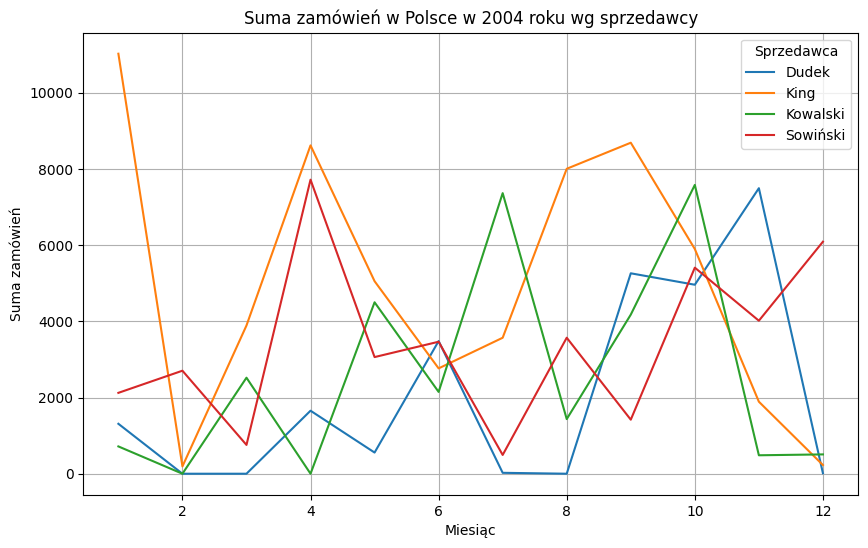

In [10]:
# Konwersja daty
df_zamowienia['Data zamowienia'] = pd.to_datetime(df_zamowienia['Data zamowienia'])

# Filtrowanie dla Polski w 2004 roku
df_2004 = df_zamowienia[
    (df_zamowienia['Kraj'] == 'Polska') &
    (df_zamowienia['Data zamowienia'].dt.year == 2004)
]

# Dodaj kolumnę z miesiącem
df_2004['Miesiac'] = df_2004['Data zamowienia'].dt.month

# Grupowanie po sprzedawcy i miesiącu
grupa = df_2004.groupby(['Sprzedawca', 'Miesiac'])['Utarg'].sum().unstack(fill_value=0)

# Wykres
plt.figure(figsize=(10, 6))
for sprzedawca in grupa.index:
    plt.plot(grupa.columns, grupa.loc[sprzedawca], label=sprzedawca)

plt.xlabel('Miesiąc')
plt.ylabel('Suma zamówień')
plt.title('Suma zamówień w Polsce w 2004 roku wg sprzedawcy')
plt.legend(title='Sprzedawca')
plt.grid(True)
plt.show()

Zadanie 3

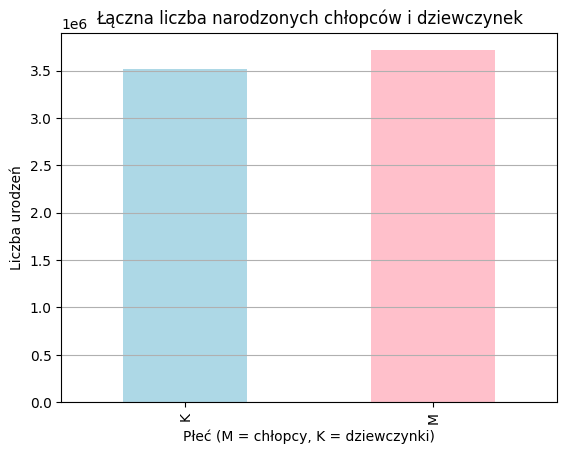

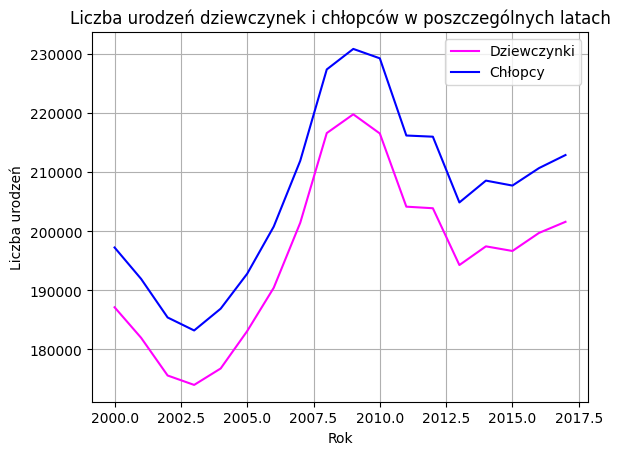

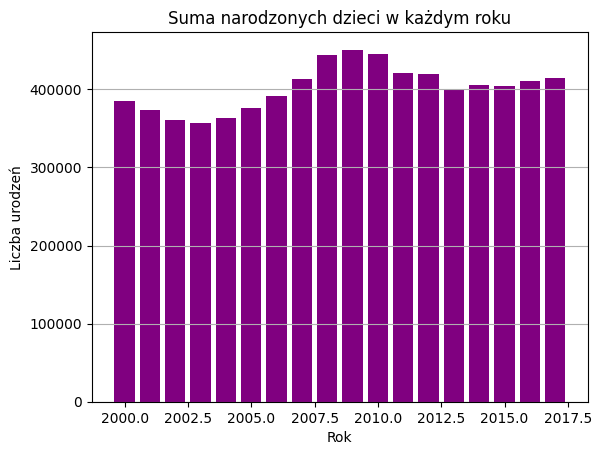

In [19]:
# 3.1 - wykres słupkowy: suma dziewczynek i chłopców w całym okresie
suma = df_narodzeni.groupby('Plec')['Liczba'].sum()

plt.figure()
suma.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Łączna liczba narodzonych chłopców i dziewczynek')
plt.ylabel('Liczba urodzeń')
plt.xlabel('Płeć (M = chłopcy, K = dziewczynki)')
plt.grid(axis='y')
plt.show()

# 3.2 - wykres liniowy: liczba urodzeń chłopców i dziewczynek w podziale na lata
dane_lata = df_narodzeni.groupby(['Rok', 'Plec'])['Liczba'].sum().unstack()

plt.figure()
plt.plot(dane_lata.index, dane_lata['K'], label='Dziewczynki', color='magenta')
plt.plot(dane_lata.index, dane_lata['M'], label='Chłopcy', color='blue')
plt.title('Liczba urodzeń dziewczynek i chłopców w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Liczba urodzeń')
plt.legend()
plt.grid(True)
plt.show()

# 3.3 - wykres słupkowy: suma urodzeń dzieci w każdym roku
dane_lata['Suma'] = dane_lata['K'] + dane_lata['M']

plt.figure()
plt.bar(dane_lata.index, dane_lata['Suma'], color='purple')
plt.title('Suma narodzonych dzieci w każdym roku')
plt.xlabel('Rok')
plt.ylabel('Liczba urodzeń')
plt.grid(axis='y')
plt.show()

Zadanie 4

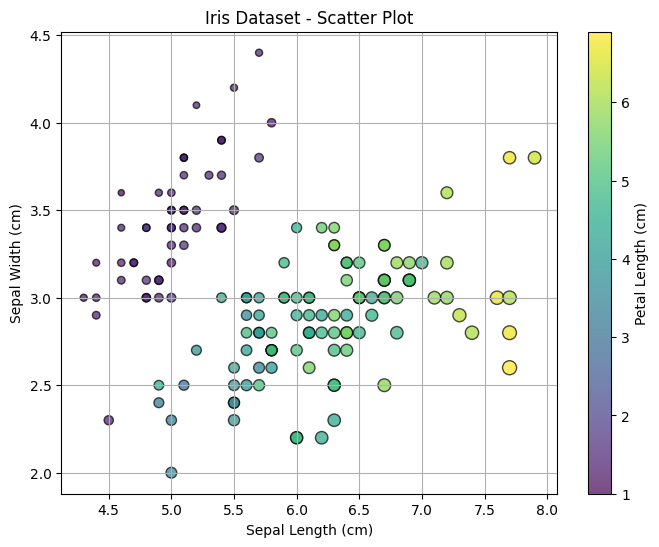

In [21]:
# Załaduj dane Iris i przekształć do DataFrame
iris_data = load_iris(as_frame=True)
df_iris = iris_data.frame

# Przygotowanie danych
x = df_iris['sepal length (cm)']
y = df_iris['sepal width (cm)']

# Parametr c (kolory) - np. petal length (jak w przykładzie)
c = df_iris['petal length (cm)']

# Parametr s (rozmiar punktu) - bezwzględna różnica x i y * 20 dla lepszej widoczności
s = (x - y).abs() * 20

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=c, s=s, cmap='viridis', alpha=0.7, edgecolor='k')

# Etykiety osi
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Scatter Plot')

# Kolorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Petal Length (cm)')

plt.grid(True)
plt.show()

Zadanie 5

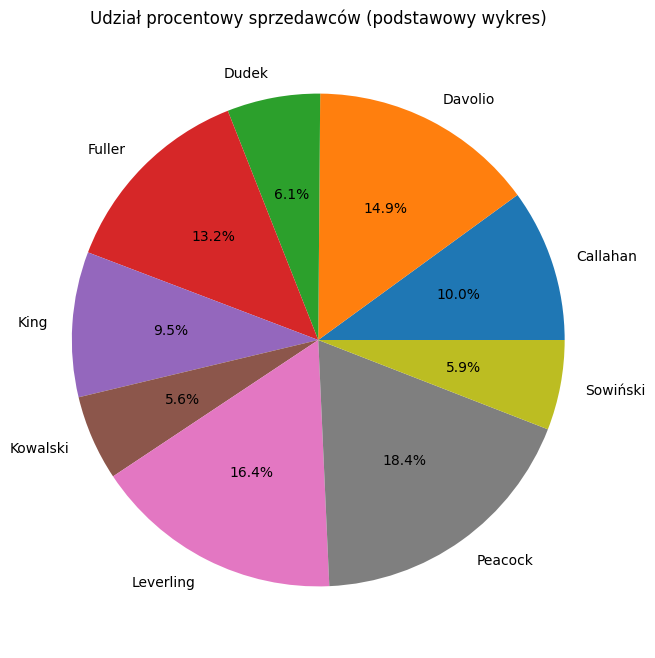

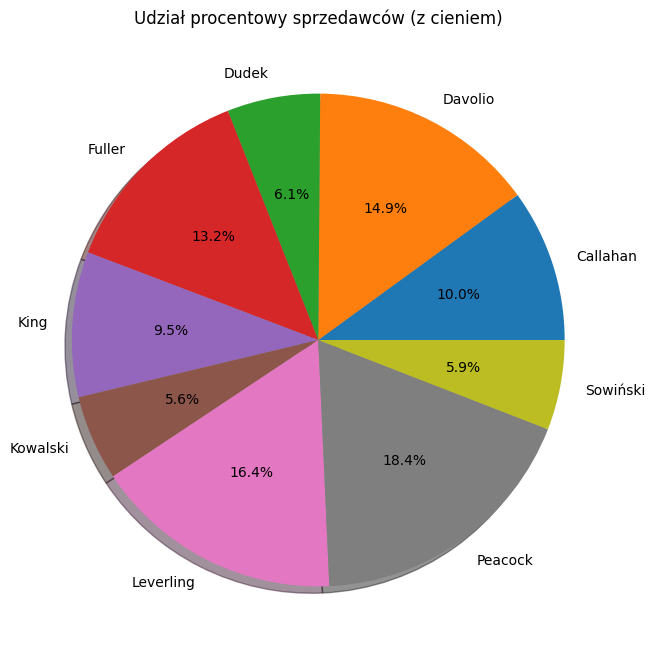

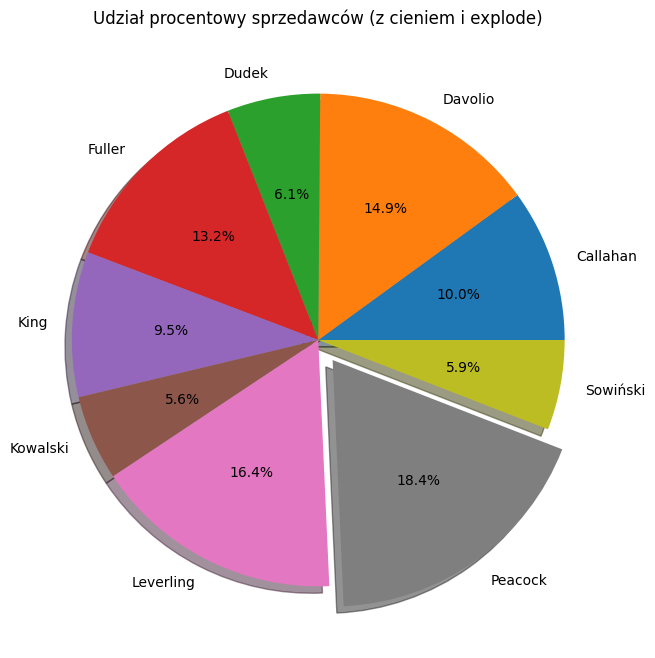

In [22]:
# Oblicz sumy zamówień dla każdego sprzedawcy
suma_zamowien = df_zamowienia.groupby('Sprzedawca')['Utarg'].sum()

# Wykres podstawowy (prosty wykres kołowy)
plt.figure(figsize=(8, 8))
plt.pie(suma_zamowien, labels=suma_zamowien.index, autopct='%1.1f%%')
plt.title('Udział procentowy sprzedawców (podstawowy wykres)')
plt.show()

# Wykres z cieniem
plt.figure(figsize=(8, 8))
plt.pie(suma_zamowien, labels=suma_zamowien.index, autopct='%1.1f%%', shadow=True)
plt.title('Udział procentowy sprzedawców (z cieniem)')
plt.show()

# Wykres z explode (wyróżnienie największego elementu)
explode = [0.1 if i == suma_zamowien.argmax() else 0 for i in range(len(suma_zamowien))]

plt.figure(figsize=(8, 8))
plt.pie(suma_zamowien, labels=suma_zamowien.index, autopct='%1.1f%%',
        shadow=True, explode=explode)
plt.title('Udział procentowy sprzedawców (z cieniem i explode)')
plt.show()

Zadanie 6

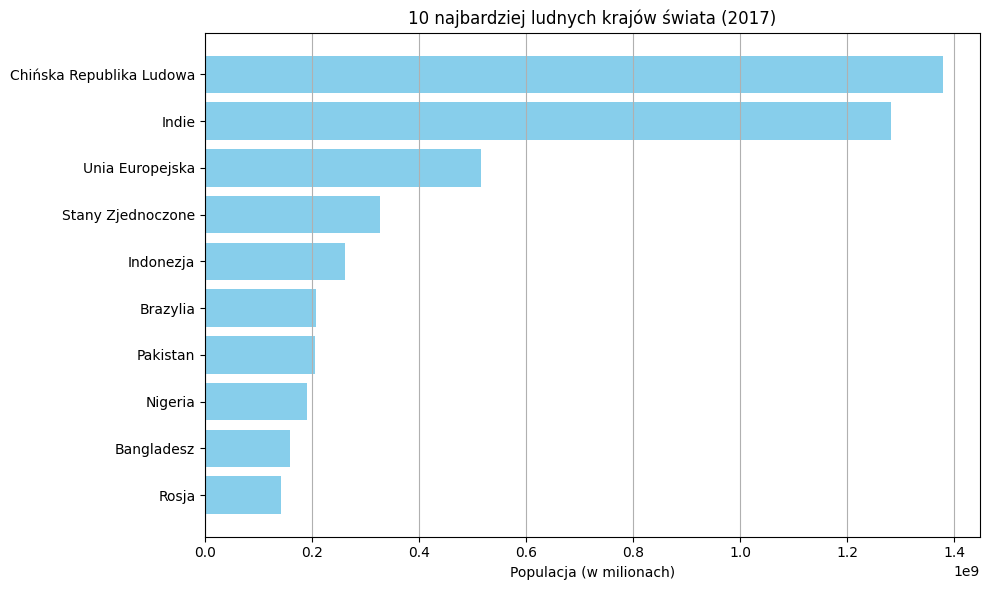

In [29]:
# Sprawdzenie i przygotowanie danych
df_2017 = df_ludnosc[['Kraj', 2017]].copy()
df_2017_sorted = df_2017.sort_values(by=2017, ascending=False).head(10)

# Wykres poziomy słupkowy (barh)
plt.figure(figsize=(10, 6))
plt.barh(df_2017_sorted['Kraj'], df_2017_sorted[2017], color='skyblue')
plt.xlabel('Populacja (w milionach)')
plt.title('10 najbardziej ludnych krajów świata (2017)')
plt.gca().invert_yaxis()  # najwyższa wartość na górze
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [27]:
print(df_ludnosc.columns)


Index(['Kraj', 2006, 2007, 2008, 2009, 2011, 2012, 2016, 2017], dtype='object')
